# Natural language processing using TextBlob

*Natural language processing (NLP)* involves the analysis and extraction of meaningful information from natural language data, such as speech or text. This notebook demonstrates several *NLP* methods using the Python module *TextBlob* (https://textblob.readthedocs.io/en/dev/).

We will look at the following analyses:
Tokenization, Stemming, Noun phrase extraction, sentiment analysis, word count analysis, and language translation powered by Google Translate.

To use TextBlob, you must import it (see below), and then create a *TextBlob* object. By convention the *TextBlob* object is stored in a variable named *blob*, as in the example below:

```python
blob = TextBlob('text to analyze')
```

In [3]:
# Triple quotes are used to denote a multi-line string
# Quote from Jude Christodal
stage = """All the world's a stage, and every word a note.
And every day is filled with songs you never knew you wrote."""

# printing stage will output across multiple lines
print(stage)

# viewing the string we can see the newline ('\n') characters
stage

All the world's a stage, and every word a note.
And every day is filled with songs you never knew you wrote.


"All the world's a stage, and every word a note.\nAnd every day is filled with songs you never knew you wrote."

In [4]:
#to install packages on macbook, go to terminal
#activate anaconda with
#"conda activate"
#Then install textblob
#"pip install textblob"
#Now you can import it on jupyter notebook
import textblob

In [5]:
# create a TextBlob object
from textblob import TextBlob
blob = TextBlob(stage)
blob

TextBlob("All the world's a stage, and every word a note.
And every day is filled with songs you never knew you wrote.")

## Tokenization

*Tokenization* is the process of splitting text into meaningful pieces (sequences of characters), such as words or sentences. In general, these  pieces are referred to as tokens. TextBlob will automatically parse text into words and sentences. 

*TextBlob* objects contain many properties (or fields) that can be accessed using the dot ('.') operator. 

In particular for tokenization, for a *TextBlob* object named *blob*,

- *blob.words* returns a list of *words*, stored in a WordList object that behaves like an ordinary *list*
- *blob.sentences* returns a list of sentences, stored as a list of Sentence objects

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juanvillegas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# get a list of words
blob.words

WordList(['All', 'the', 'world', "'s", 'a', 'stage', 'and', 'every', 'word', 'a', 'note', 'And', 'every', 'day', 'is', 'filled', 'with', 'songs', 'you', 'never', 'knew', 'you', 'wrote'])

In [8]:
len(blob.words)
blob.words[0]

'All'

### Exercise
How many words are there? What is the first word?

In [9]:
len(blob.words)

23

In [10]:
blob.words[0]

'All'

In [11]:
# get a list of sentences
blob.sentences

[Sentence("All the world's a stage, and every word a note."),
 Sentence("And every day is filled with songs you never knew you wrote.")]

**Note**: Each sentence has all the properties of a *TextBlob* object.

In [12]:
# get first sentence
sentence1 = blob.sentences[0]

# Since sentence1 is like a TextBlob, we can get its words using the following
sentence1.words

WordList(['All', 'the', 'world', "'s", 'a', 'stage', 'and', 'every', 'word', 'a', 'note'])

## Part of speech tagging

*TextBlob* automatically carries out part-of-speech tagging, as shown below. The *tags* property includes a list of tuples in the form (word, part of speech). Common tags include *NN* for noun (singular or mass), *NNS* for noun (plural), and *VBN*, *VBZ*, and *VB* which are different types of verbs. For a list of tags, see https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [13]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/juanvillegas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
blob.tags

[('All', 'PDT'),
 ('the', 'DT'),
 ('world', 'NN'),
 ("'s", 'POS'),
 ('a', 'DT'),
 ('stage', 'NN'),
 ('and', 'CC'),
 ('every', 'DT'),
 ('word', 'NN'),
 ('a', 'DT'),
 ('note', 'NN'),
 ('And', 'CC'),
 ('every', 'DT'),
 ('day', 'NN'),
 ('is', 'VBZ'),
 ('filled', 'VBN'),
 ('with', 'IN'),
 ('songs', 'NNS'),
 ('you', 'PRP'),
 ('never', 'RB'),
 ('knew', 'VBD'),
 ('you', 'PRP'),
 ('wrote', 'VBD')]

In [15]:
blob.tags[0]

('All', 'PDT')

### Exercise
Print out all of the nouns (which have tags of 'NN', or 'NNS', 'NNP', or 'NNPS'; no other part of speech contains an 'NN')

In [16]:
for word, pos in blob.tags:
    
    #if word is a noun
   # if pos == 'nn':
    # If a word contains nn
    if 'NN' in pos:
        print(word)

world
stage
word
note
day
songs


Create a list of all the nouns

In [17]:
nouns = []

for word, pos in blob.tags:
    if 'NN' in pos:
        nouns.append(word)
nouns

['world', 'stage', 'word', 'note', 'day', 'songs']

In [18]:
nouns = [ word        for word, pos,             in blob.tags        if 'NN' in pos            ]

nouns

['world', 'stage', 'word', 'note', 'day', 'songs']

## Noun phrase extraction

*Noun phrase extraction* involves the identification of *noun phrases*, which are phrases that include nouns (possibly following one or more adjectives)

For a *TextBlob* object named *blob*, a list of noun phrases are returned using *blob.noun_phrases*.

In [19]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/juanvillegas/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [20]:
blob = TextBlob('Amy has a new red car')
blob.noun_phrases

WordList(['amy', 'new red car'])

## Sentiment analysis

A *sentiment analysis* measures the emotional content of text. We will use sentiment analysis to identify text as *positive* or *negative*, though other emotions can also be detected.

For a *TextBlob* object named *blob*, its sentiment can be found by using *blob.sentiment*, which will give you a Sentiment object (a named tuple) that contains the following:

- polarity: a score between -1 (negative sentiment) and +1 (positive sentiment)
- subjectivity: a score between 0 (objective) and +1 (subjective)



In [21]:
blob = TextBlob('I love this class')
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [22]:
blob = TextBlob('This class sucks!')
blob.sentiment

Sentiment(polarity=-0.375, subjectivity=0.3)

In [23]:
# the sentiment of a text blob will represent an average sentiment over multiple sentiments
blob = TextBlob('This class is great. This class is awesome. This class sucks. This class sucks!!! This class is okay.')
blob.sentiment

Sentiment(polarity=0.2828125, subjectivity=0.57)

In [24]:
# but we can find the polarity of each sentence
for s in blob.sentences:
    print('"', s, '" has a polarity of ', s.sentiment.polarity, sep = '')


"This class is great." has a polarity of 0.8
"This class is awesome." has a polarity of 1.0
"This class sucks." has a polarity of -0.3
"This class sucks!!!" has a polarity of -0.5859375
"This class is okay." has a polarity of 0.5


## Stemming 

*Stemming* is a normalization method that takes a word and converts it into a *base* form by removing word endings (suffixes) or prefixes.

For a *TextBlob* word object, you can get the *stem* by calling *word.stem()*.

Lemmatization is a related technique that takes the word's part of speech into account and returns a dictionary form of the word.

Stemming and lemmatization are useful for counting words, since different forms of the same word (like 'runs' and 'run' should probably be counted as one word).

In [25]:
blob = TextBlob('run runs running ran')

# get word stems
for w in blob.words :
    print(w, ': ', w.stem(), sep = '')

run: run
runs: run
running: run
ran: ran


## Word counts

Word counts are automatically calculated when a *TextBlob* object is created. The word counts of a *TextBlob* named *blob* are stored in *blob.word_counts*, which is a default dictionary (a dictionary where keys that do not exist have a default value, which in this case is 0).

In [26]:
# Song lyrics by House of Pain
jump = 'So get out your seat and jump around! Jump around! Jump around! Jump up, jump up and get down!'
blob = TextBlob(jump)
blob.word_counts

defaultdict(int,
            {'so': 1,
             'get': 2,
             'out': 1,
             'your': 1,
             'seat': 1,
             'and': 2,
             'jump': 5,
             'around': 3,
             'up': 2,
             'down': 1})

How many times does 'jump' appear?

In [27]:
blob.word_counts['jump']

5

Because word_counts is a default dictionary, looking up a word not in the dictionary will return 0, and also add the word to the dictionary! Note: we could remove a key from a dictionary *d* by using *d.pop(key)*.

In [28]:
blob.word_counts['cheese']

0

We can iterate through the keys of a dictionary using a for loop (*for keys in dict*). We also can iterate through key,value pairs of a dictionary by using *dictionary.items()*.

In [29]:
for word, count in blob.word_counts.items() :
    print(word, ': ', count, sep = '')

so: 1
get: 2
out: 1
your: 1
seat: 1
and: 2
jump: 5
around: 3
up: 2
down: 1
cheese: 0


## Stopwords

Stopwords are common words (like 'a' and 'the') that should be ignored when analyzing text.

We can get a list of stopwords from the *nltk.corpus*, using the function *stopwords.words()*. We convert this list to a *set*, which is a collection of unordered items (i.e., it is *not* a sequence). The advantage of a set is that it has a constant lookup time, meaning that it is faster to test whether an item is in a set than testing when an item is in a list.

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juanvillegas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# create a set of stopwords
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Removing stop words

List comprehension can be used to create a list of (word, frequency) tuples with stop words removed.

In [32]:
# create a list of (word, frequency) tuples but with stop words removed
words = [ (w, f) for w,f in blob.word_counts.items() if w not in sw]
words

[('get', 2), ('seat', 1), ('jump', 5), ('around', 3), ('cheese', 0)]

## Sorting by frequency

The following code will return a sorted list, where the sorting is based on reading list elements from left to right.
```python
sorted(listName)
```

If the lists contains tuples, then sorting will be based on the first element of each tuple. But sometimes we want to sort based on another element. This is accomplished by specifying the *key* argument to the *sorted* function. An *itemgetter* can be used here to specify the *index* to use for sorting.

In [33]:
# sort the list
from operator import itemgetter

# sort the word list by frequency (stored in index 1 of each tuple) in reverse order (highest to lowest)
words = sorted(words, key = itemgetter(1), reverse=True)
words

[('jump', 5), ('around', 3), ('get', 2), ('seat', 1), ('cheese', 0)]

## Generating a bar graph of word frequencies

A *bar graph* visualizes word frequencies by using a bar for each word; the height of the bar corresponds to the frequency of the word. 

In order to create a bar graph, we first create a data frame (a table) of word frequencies. The *pandas* module is used to create the data frame.

In [34]:
import pandas as pd

# create a data frame from a list of tuples (each element will be a column)
df = pd.DataFrame(words, columns = ['word', 'frequency'])
df

,word,frequency
0,jump,5
1,around,3
2,get,2
3,seat,1
4,cheese,0


We can then create a bar graph directly from the data frame, using pandas *plot.bar* function. Note that a *None* is included at the end the cell to prevent the cell from displaying the value returned by the *ax.set_title* statement.

In [35]:
3+ 7

10

In [36]:
3+7 
None

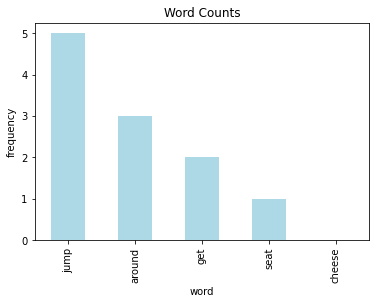

In [37]:
# generate a bar graph, where 'x' and 'y' are the data frame columns to use
ax = df.plot.bar(x = 'word', y = 'frequency', legend = False, color = 'lightblue')

# add y-axis labels and a title
ax.set_ylabel('frequency')
ax.set_title('Word Counts')
None

### Exercise

Because we looked up 'cheese' previously, this was added to the dictionary. How can we update the words list of tuples to remove (word, frequency) pairs where the frequency was 0?

In [38]:
words
# w = word
# f = frequency

[('jump', 5), ('around', 3), ('get', 2), ('seat', 1), ('cheese', 0)]

In [39]:
words  = [  (w,f)  for w, f in words if f > 0   ]

In [40]:
words

[('jump', 5), ('around', 3), ('get', 2), ('seat', 1)]

We can generate a horizontal bar graph using the 'plot.barh' function

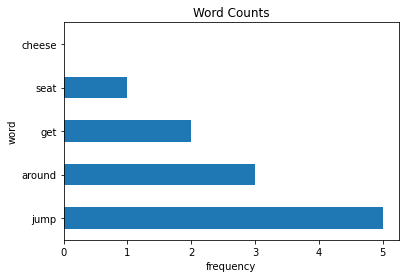

In [41]:
ax = df.plot.barh(x = 'word', y = 'frequency', legend = False)
ax.set_xlabel('frequency')
ax.set_title('Word Counts')
None

## Word clouds

A *word cloud* is a visualization of words where the size of each word is proportional to its frequency. Word clouds can be generated directly from text or from a dictionary containing words and their corresponding frequencies.

The default WordCloud has the following arguments:

```python
WordCloud(background_color = 'black', stopwords = None, colormap = 'viridis', ...)
```

The *stopwords* argument can be a set of strings of stop words to remove; the default value of *None* will use a built-in stopwords list.

For additional colormaps see https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


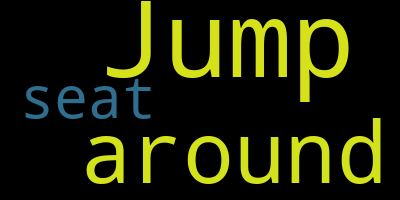

In [42]:
from wordcloud import WordCloud
# generate a word cloud from text (stop words will be removed)
wordcloud = WordCloud().generate(jump)
wordcloud.to_image()

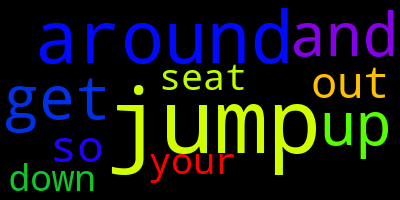

In [43]:
# generate a word cloud from a dictionary of frequencies
wordcloud = WordCloud(colormap = 'prism').generate_from_frequencies(blob.word_counts)
wordcloud.to_image()

## Language translation

TextBlob can use Google Translate's API (Application Programming Interface) to detect the language of text and to translate between a variety of languages. 

The supported languages and abbreviations can be found here: https://cloud.google.com/translate/docs/languages

When *TextBlob* is used for language detection or translation, a request is sent to Google Translate, which carries out the task and returns the result (an internet connection is therefore required). 

In [78]:
# create a new blob and detect the language
blob = TextBlob('¿Hola como estas?')
blob

TextBlob("¿Hola como estas?")

In [79]:
# default translation will be to english (to='en')
blob.translate()

TextBlob("Hi, how are you?")

In [80]:
# let's translate this to Chinese (simplified)
blob.translate(to='zh')

TextBlob("你好你好吗？")